In [1]:
import matplotlib.pyplot as plt ### plotting things
import numpy as np ## one of python's main maths packages
import pandas as pd ## for reading in our data
from scipy.optimize import curve_fit ## for fitting a line to our data
import matplotlib.ticker as ticker ## this one lets us change some parameters in our plots.
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
from IPython.display import display, Markdown

In [2]:
data = pd.read_excel('../data/BoltData.xlsx', 
                        names=('distance', 'err_distance', 'time', 'err_time'), 
                        usecols=(0,1,2,3), 
                        nrows=11)

# Making a plot with `matplotlib`

## Overview:
- **Teaching:** 5 min
- **Exercises:** 5 min

**Questions**
- How do you make a plot in Jupyter?
- What should it include?
- How do you save it to a file?

**Objectives**
- Make a plot of the data
- Add axis labels and errorbars
- Save to a file

## Taking a quick look at our data
Now we have our data in a useful format we can start to look at it. 

To make a quick plot we use the `matplotlib.pyplot` package, that we loaded as `plt`.

First make a plot with all the default settings to take a quick look at our data. You should always take a quick look at your data to make sure there aren't any suprises like weird points or typos.

To plot the data from our dataframe, we call the columns we want to plot using 
```python
plt.plot(dataframe.xcolumn, dataframe.ycolumn)
```
where `xcolumn` and `ycolumn` are the names of the columns we want to see.

First we will make a quick plot to see what our data looks like. 

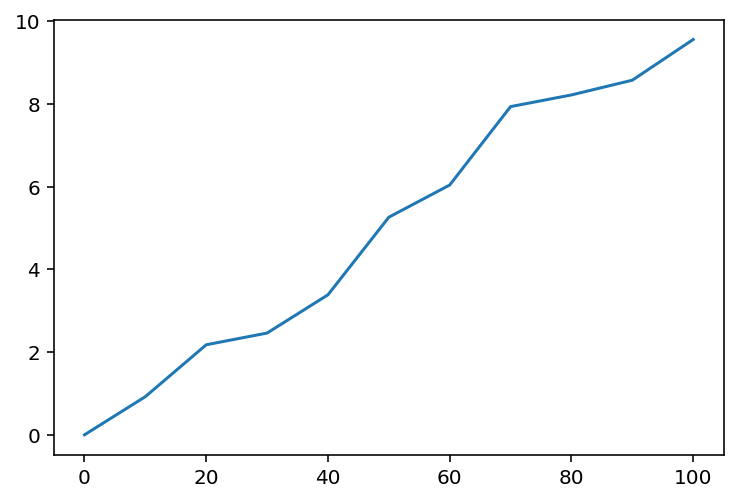

In [3]:
plt.plot(data.distance, data.time)

We can see from this quick plot that our data looks fine, but it's not particularly informative right now. We don't have axis labels, or errorbars, for example. We can now play around with different things in `plt` to add what we want to our plot.

## Information: `subplot`

Even if you only have one figure, you can use the `subplot` command. This lets you set the parameters in your plot (rather than the whole figure) by referring to the name of the subplot:
```python
ax = fig.add_subplot(nrows,ncols,index)
```
Here `nrows` is the number of rows of plots you want, ncols is the number of columns, and index tells it where to put the subplot, starting at 1 in the upper left corner and increasing to the right.
So
```python
ax = fig.add_subplot(1,1,1)
```
will split your figure into 1 row, 1 column, and make the plot in the 1st position.
```python
ax = fig.add_subplot(2,3,4)
```
would split the figure into 2 rows and 3 columns, and make your plot in the lower left plot.

## What makes a good scientific plot?

Any plot you make should be clear and informative. There are several things that you **always** need on a plot of your results:
* Error bars
* Axis labels
* Units

We can do this pretty easily with `plt`. First we call `errorbar` to plot our points and errorbars.

```python
ax.errorbar(data.distance,           
             data.time,              
             xerr=data.err_distance, 
             yerr=data.err_time,     
             marker='o',             
             markersize = 7,        
             color='black',          
             linestyle='none',       
             capsize=6,              
             )
```

In the first example we used `plt.plot`. As we're using a `subplot` object, we use `ax.errorbar` (or `ax.plot`) to tell Python to plot the data on the `ax` `subplot` we created.

Here were're calling `errorbar`, telling it which columns correspond to the `x` and `y` uncertainties and the size and shape, and colour of our points. `linestyle='none'` is telling it **not** to draw a line joining up all our points. `capsize` sets the size the end bars on the errorbars.
This command looks pretty long, but we'll look later at how to set some parameters as defaults.

Finally, we add the axis labels **including the units** using `ax.set_xlabel` and `ax.set_ylabel` so our plot actually means something. 


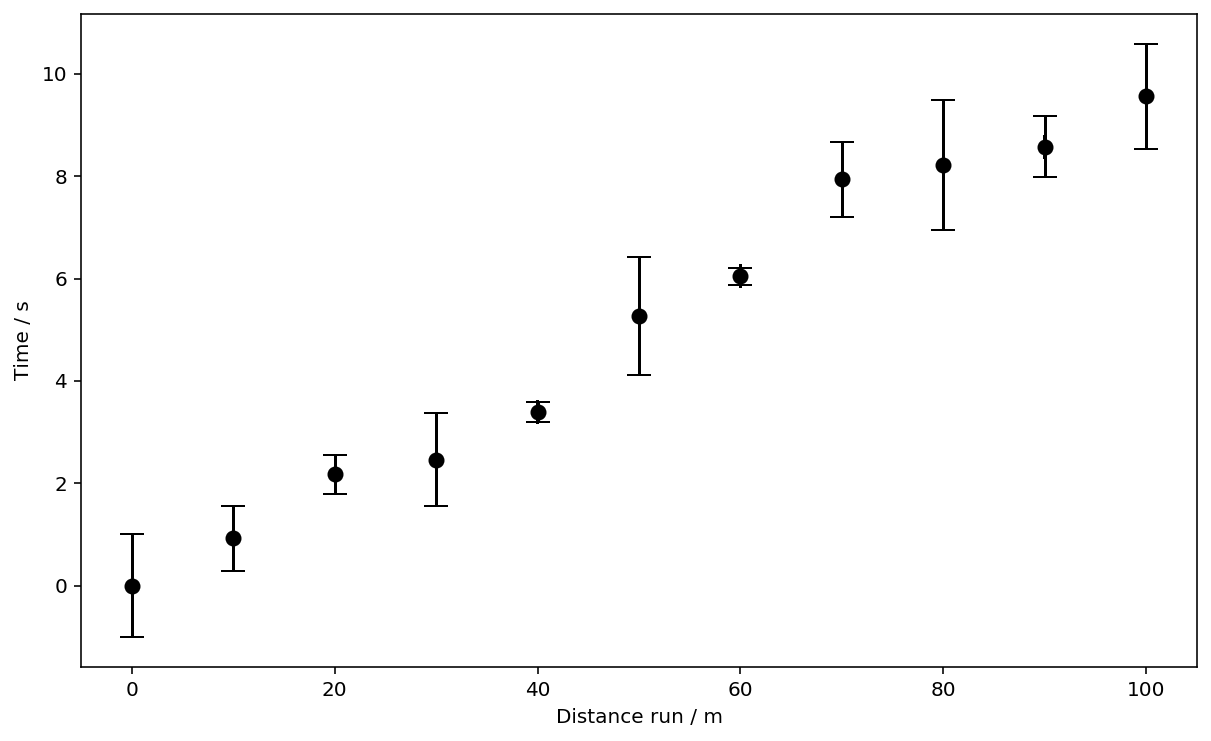

In [4]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data.distance,           
             data.time,              
             xerr=data.err_distance, 
             yerr=data.err_time,     
             marker='o',             
             markersize = 7,
             markerfacecolor = 'black',
             color='black',          
             linestyle='none',       
             capsize=6,              
             )

ax.set_xlabel('Distance run / m')
ax.set_ylabel('Time / s')

plt.show()

## Exercise: Customise the plot
The plot above is informative, but it's not the prettiest.

Edit the parameters in the code above to change the following:

* Change the colour of the points
* Change the point (`marker`) shape and size

Information about how to change the colour and shape of the markers can be found [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

[solution]()

## Solution+: Customise the plot

The colour of the points is defined with the `markerfacecolor` keyword. You can define the colour in multiple ways, but the one of the easiest ways is using [X11 Colour Names](https://en.wikipedia.org/wiki/Web_colors#X11_color_names). 


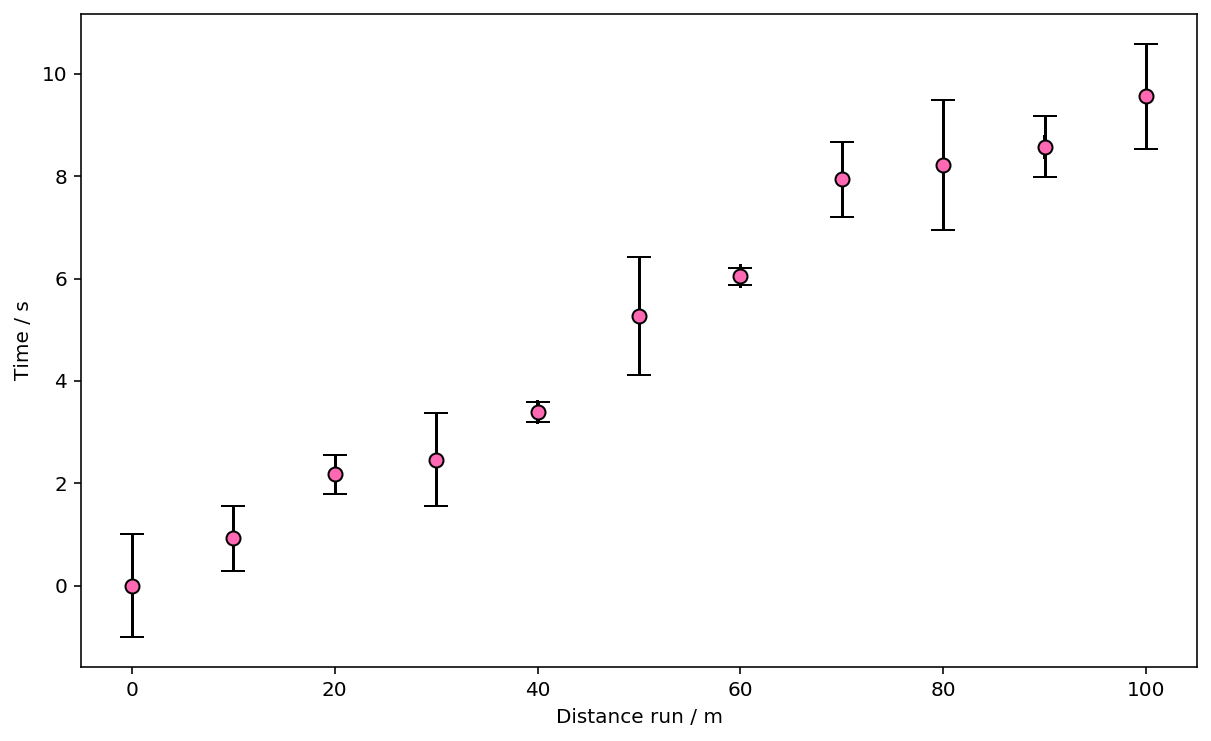

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data.distance,           
             data.time,              
             xerr=data.err_distance, 
             yerr=data.err_time,     
             marker='o',             
             markersize = 7,        
             color='black',          
             markerfacecolor='hotpink',
             linestyle='none',       
             capsize=6,              
             )

ax.set_xlabel('Distance run / m')
ax.set_ylabel('Time / s')

plt.show()

`markerfacecolor` changes the fill colour of the points. The edge colour of the points is defined with `markeredgecolor`. If we want the points to be all one colour without a black outline, we  have to set both parameters.

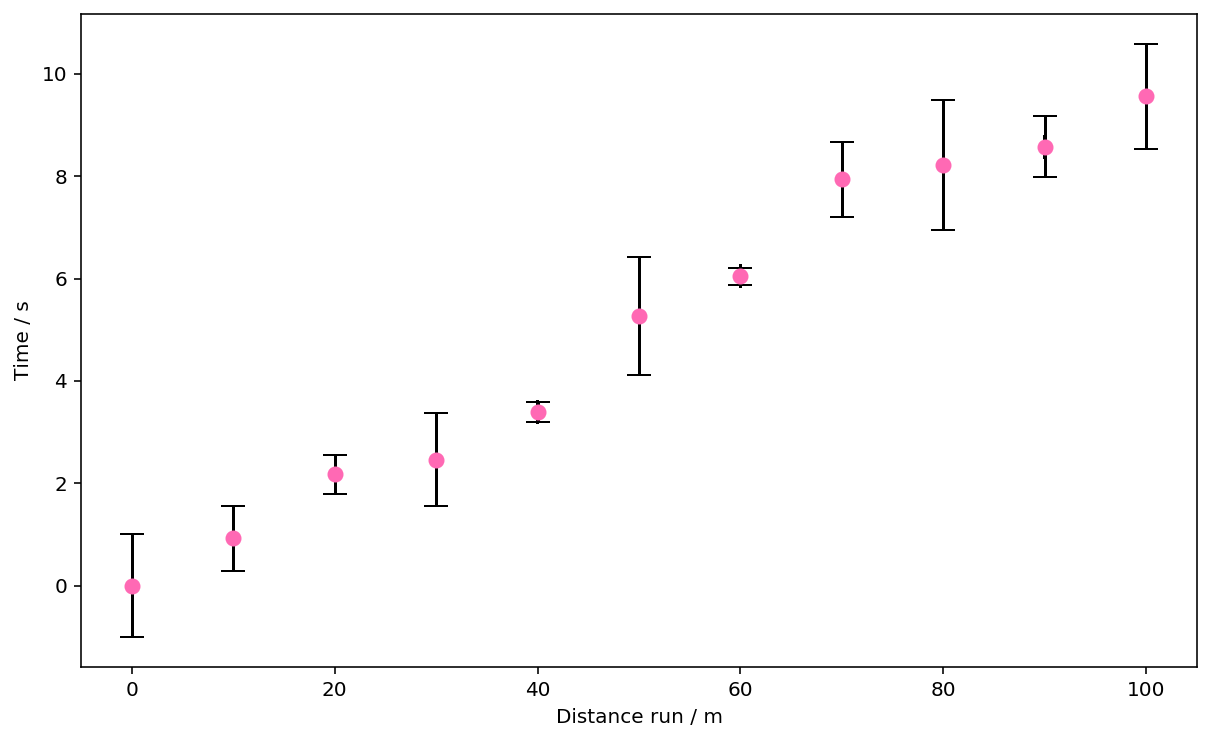

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data.distance,           
             data.time,              
             xerr=data.err_distance, 
             yerr=data.err_time,     
             marker='o',             
             markersize = 7,        
             color='black',          
             markerfacecolor='hotpink',
             markeredgecolor='hotpink',
             linestyle='none',       
             capsize=6,              
             )

ax.set_xlabel('Distance run / m')
ax.set_ylabel('Time / s')

plt.show()

The shape of the points is controlled by the `marker` keyword. The previous plots use `marker='o'` to produce a circle. There's a long list of [`matplotlib` markers](https://matplotlib.org/api/markers_api.html). Here we'll change the points to be stars using `marker='*'`.

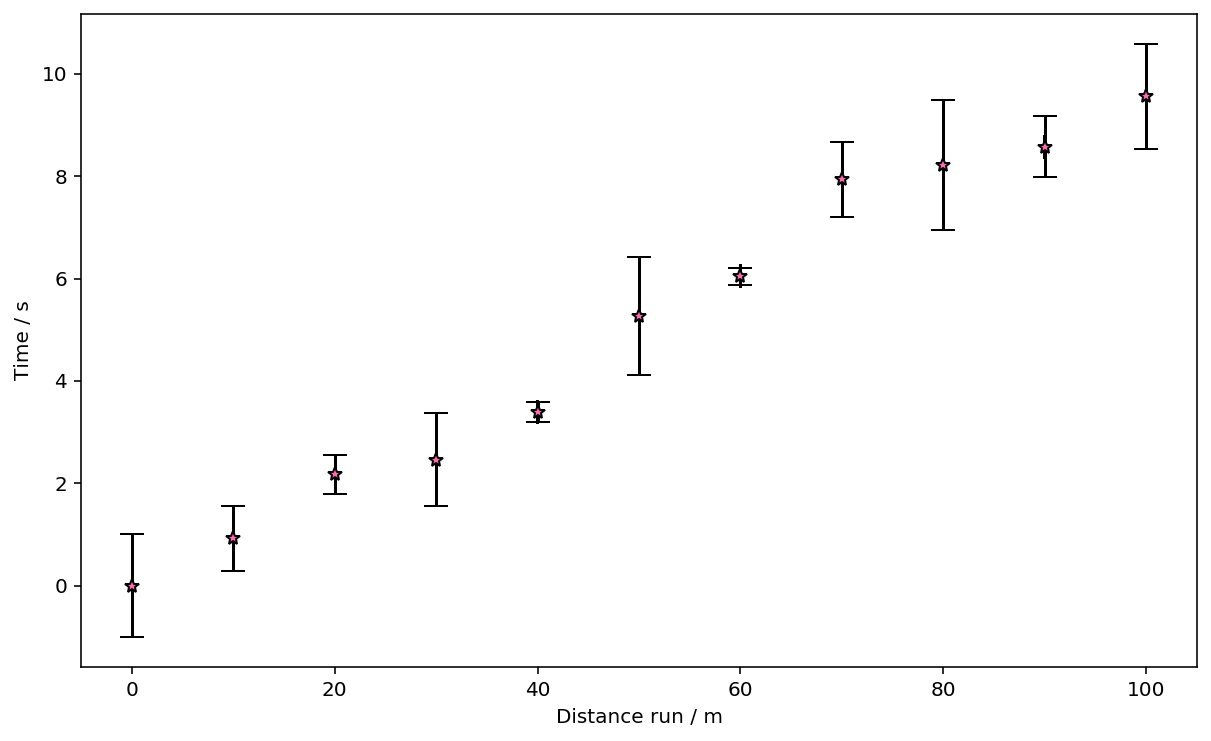

In [7]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data.distance,           
             data.time,              
             xerr=data.err_distance, 
             yerr=data.err_time,     
             marker='*',             
             markersize = 7,        
             color='black',          
             markerfacecolor='hotpink',
             markeredgecolor='black',
             linestyle='none',       
             capsize=6,              
             )

ax.set_xlabel('Distance run / m')
ax.set_ylabel('Time / s')

plt.show()

The stars are a bit too small, so we should make them bigger using `markersize`.

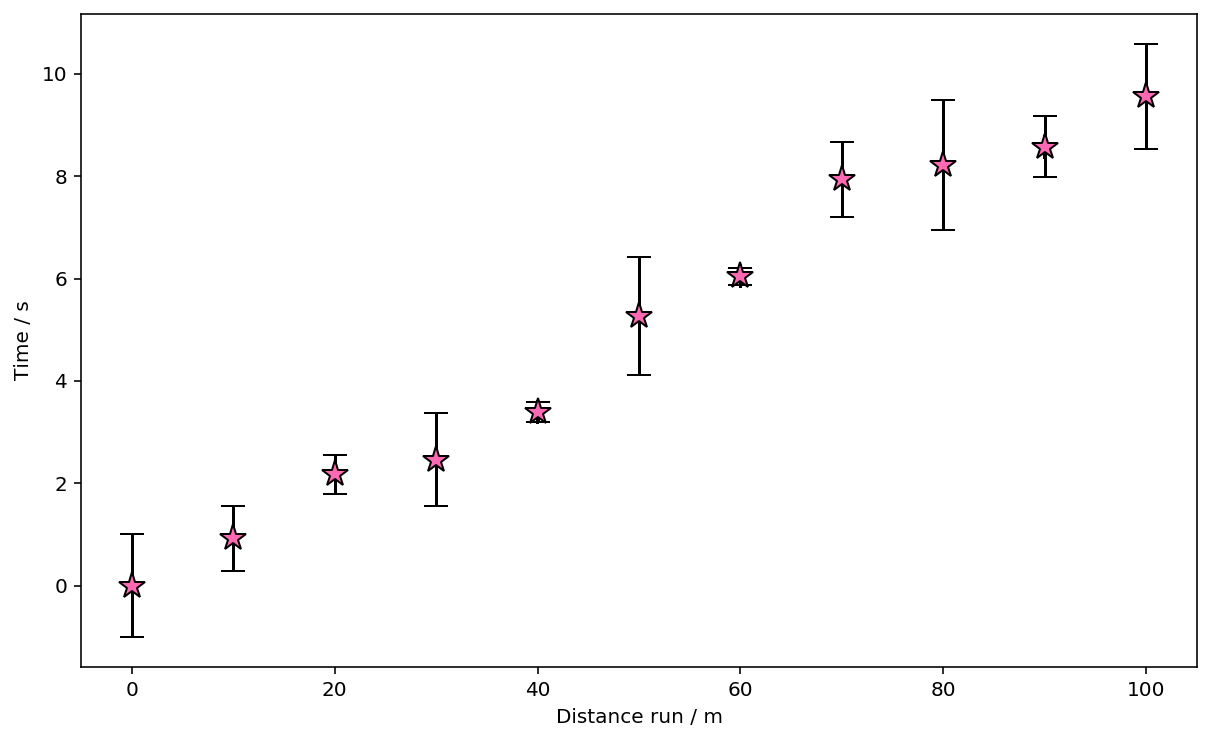

In [8]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data.distance,           
             data.time,              
             xerr=data.err_distance, 
             yerr=data.err_time,     
             marker='*',             
             markersize = 14,        
             color='black',          
             markerfacecolor='hotpink',
             markeredgecolor='black',
             linestyle='none',       
             capsize=6,              
             )

ax.set_xlabel('Distance run / m')
ax.set_ylabel('Time / s')

plt.show()

:solution+

## Saving the plot to a file

In order to use your plot in your lab report, you need to save it to a file using `savefig`. You just need to give `savefig` the output file name and the resolution you want.

In [9]:
fig.savefig('Basic.png', dpi=300) 

## Key Points:
- All plots should include:
 * Error bars
 * Axis labels
 * Units
- Use the `subfig` environment to make customisation easier
- Save your plot using `savefig`
